In [118]:
%matplotlib inline
#%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
#xl = pd.ExcelFile('../Sites/Tumbarumba/Data/Processed/all/Tumbarumba_2001_to_2014_L6.xlsx')
#xl.sheet_names

#QCData = xl.parse("Data", index_col = 0, header = 2)
#QCData = QCData.applymap(lambda x: np.nan if x < -9000 else x)
#QCData.head()
#QCData.to_pickle('../Sites/Tumbarumba/Data/Processed/all/Tumbarumba_2001_to_2014_L6_Data.df')

#QCFlag = xl.parse("Flag", index_col = 0, header = 2)
#QCFlag.head()
#QCFlag.to_pickle('../Sites/Tumbarumba/Data/Processed/all/Tumbarumba_2001_to_2014_L6_Flag.df')

In [120]:
QCData = pd.read_pickle('../../Sites/Tumbarumba/Data/Processed/all/Tumbarumba_2001_to_2014_L6_Data.df')
QCFlag = pd.read_pickle('../../Sites/Tumbarumba/Data/Processed/all/Tumbarumba_2001_to_2014_L6_Flag.df')
DIData = pd.read_pickle('../../Sites/Tumbarumba/Data/DINGO/V12a/Advanced_processed_data_Tumbarumba_v12a.df')

In [121]:
QCMonthly = QCData.resample("M")
DIMonthly = DIData.resample("M")

In [122]:
ET = pd.DataFrame({'ET_OFQC' : QCMonthly.Fe, 'Fe_DINGO' : DIMonthly.Fe_Con})

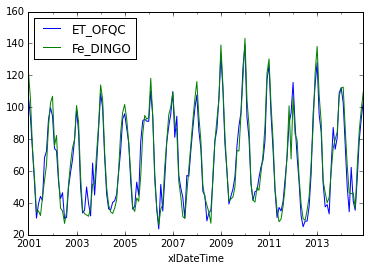

In [123]:
ET.plot()

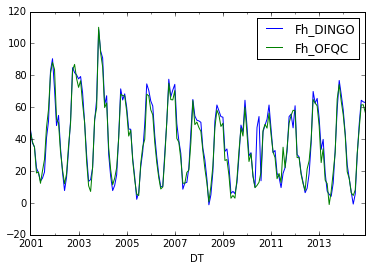

In [124]:
Fh = pd.DataFrame({'Fh_OFQC' : QCMonthly.Fh, 'Fh_DINGO' : DIMonthly.Fh_Con})
Fh.plot()

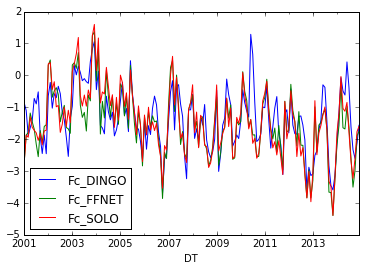

In [125]:
NEE = pd.DataFrame({'Fc_SOLO' : QCMonthly.NEE_SOLO, 'Fc_FFNET' : QCMonthly.NEE_FFNET,'Fc_DINGO' : DIMonthly.Fc_ustar_Barr})
NEE.plot()

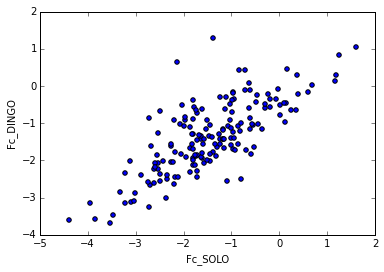

In [126]:
NEE.plot(kind='scatter', x='Fc_SOLO', y='Fc_DINGO')

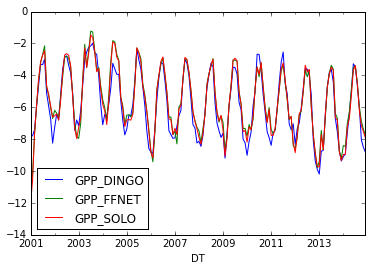

In [136]:
GPP = pd.DataFrame({'GPP_SOLO' : -1*QCMonthly.GPP_SOLO,'GPP_FFNET' : -1*QCMonthly.GPP_FFNET, 
                    'GPP_DINGO' : DIMonthly.GPP_Con_Barr,'GPP_LLop' : DIMonthly.GPP_Lasslop})
GPP = pd.DataFrame({'GPP_SOLO' : -1*QCMonthly.GPP_SOLO,'GPP_FFNET' : -1*QCMonthly.GPP_FFNET, 
                    'GPP_DINGO' : DIMonthly.GPP_Con_Barr,})
GPP.plot()

In [128]:
ReEvG = 2.5997*np.exp(0.0648*QCData.Ts)
ReEvG = ReEvG.resample("M")

In [129]:
RE = pd.DataFrame({'RE_SOLO' : QCMonthly.Fre_SOLO,'RE_FFNET' : QCMonthly.Fre_FFNET, 
                   'RE_DINGO' : DIMonthly.Fre_Con_Barr, 'RE_LLop' : DIMonthly.Fre_Lasslop,
                  'RE_EvG' : ReEvG})

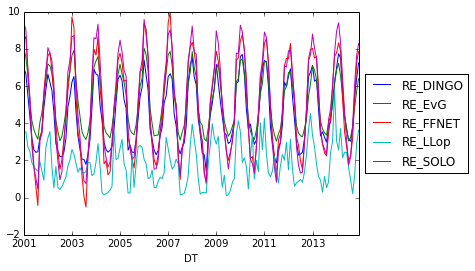

In [130]:
f = plt.figure()

RE.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

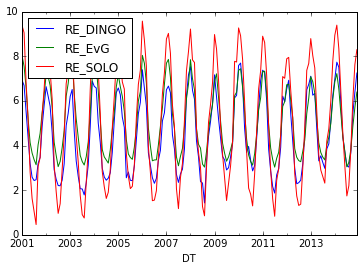

In [134]:
RE = pd.DataFrame({'RE_SOLO' : QCMonthly.Fre_SOLO,'RE_EvG' : ReEvG, 'RE_DINGO' : DIMonthly.Fre_Con_Barr})
RE.plot()

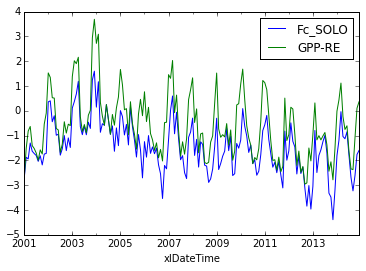

In [132]:
clos = pd.DataFrame({'GPP-RE' : -(QCMonthly.GPP_SOLO -  QCMonthly.Fre_SOLO) ,'Fc_SOLO' : QCMonthly.NEE_SOLO})
clos.plot()

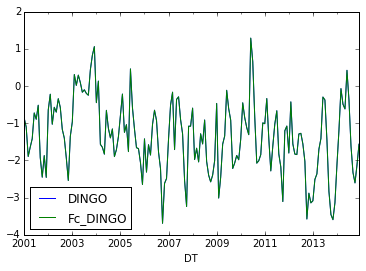

In [133]:
clos = pd.DataFrame({'DINGO' : DIMonthly.Fre_Con_Barr + DIMonthly.GPP_Con_Barr ,'Fc_DINGO' : DIMonthly.Fc_ustar_Barr})
clos.plot()